In [2]:
# Import Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,8) # Adjusts the configration of the plots we will create

# Read the data
df = pd.read_csv(r'C:\Users\Paras Mahajan\Desktop\projects_for_linkedin\python\movies.csv')

In [3]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see if there is any missing data

for col in df.columns:
    percent_missing = round((np.mean(df[col].isnull())*100),3)
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 1.004%
genre - 0.0%
year - 0.0%
released - 0.026%
score - 0.039%
votes - 0.039%
director - 0.0%
writer - 0.039%
star - 0.013%
country - 0.039%
budget - 28.312%
gross - 2.465%
company - 0.222%
runtime - 0.052%


In [5]:
# to display the 100 rows
pd.set_option('display.max_rows',100)

In [6]:
#deleting the rows with null values less than 3% in any column
col_to_drop_missing_values=[]
for col in df.columns:
    if np.mean(df[col].isnull())*100 <3 and (np.mean(df[col].isnull())*100) >0:
        col_to_drop_missing_values.append(col)

In [7]:
for col in col_to_drop_missing_values:
    df.drop(labels=df[df[col].isnull()].index, inplace=True)

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [10]:
df[df['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,Wonder Woman 1984,PG-13,Action,2020,"December 25, 2020 (United States)",5.4,217000.0,Patty Jenkins,Patty Jenkins,Gal Gadot,United States,NaN,166534027.0,Atlas Entertainment,151.0
7647,Onward,PG,Animation,2020,"March 6, 2020 (United States)",7.4,120000.0,Dan Scanlon,Dan Scanlon,Tom Holland,United States,NaN,141950608.0,Walt Disney Pictures,102.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0


In [11]:
# from the code it is clear that there is no movie with zero budget
# So we're going to consider null value as zero
df['budget']=df['budget'].fillna(0)

In [12]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [13]:
# Now our dataset has no missing value

In [14]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [16]:
# change data datatype of columns score, budget and gross

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [18]:
df['date']=df['released'].str.split('(',expand=True)[0]

In [19]:
df['country']=df['released'].str.split('(',expand=True)[1]

In [20]:
df['country'] = df['country'].apply(lambda x:x[0:-1])

In [21]:
# seperated the column released into date and country

In [22]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [23]:
# seprate the date into year, month and day

In [24]:
df['date']=pd.to_datetime(df['date'], format='mixed')

In [25]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [26]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,month,day
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,1980-06-13,6,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,7,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,6,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,7,2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,7,25


In [27]:
# sort the values by gross
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [28]:
pd.set_option('display.max_rows',100)

In [29]:
# Checking the total number of companies
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2242, dtype: object

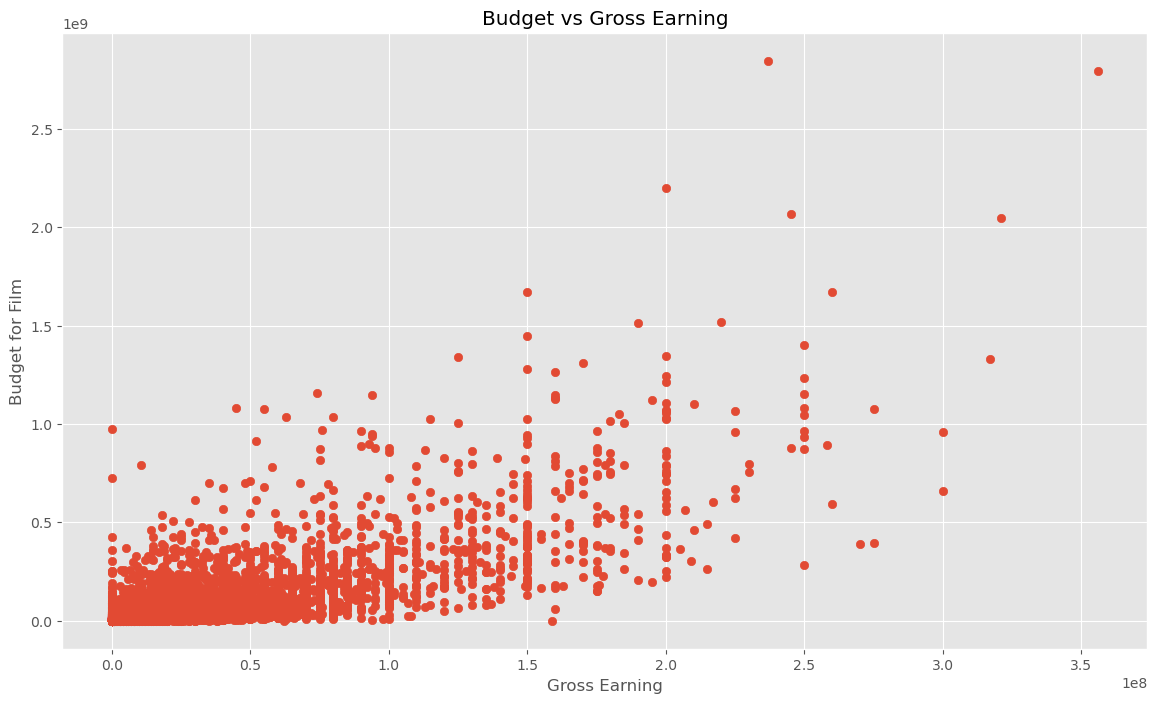

In [30]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earning')

plt.xlabel('Gross Earning')

plt.ylabel('Budget for Film')

plt.show()

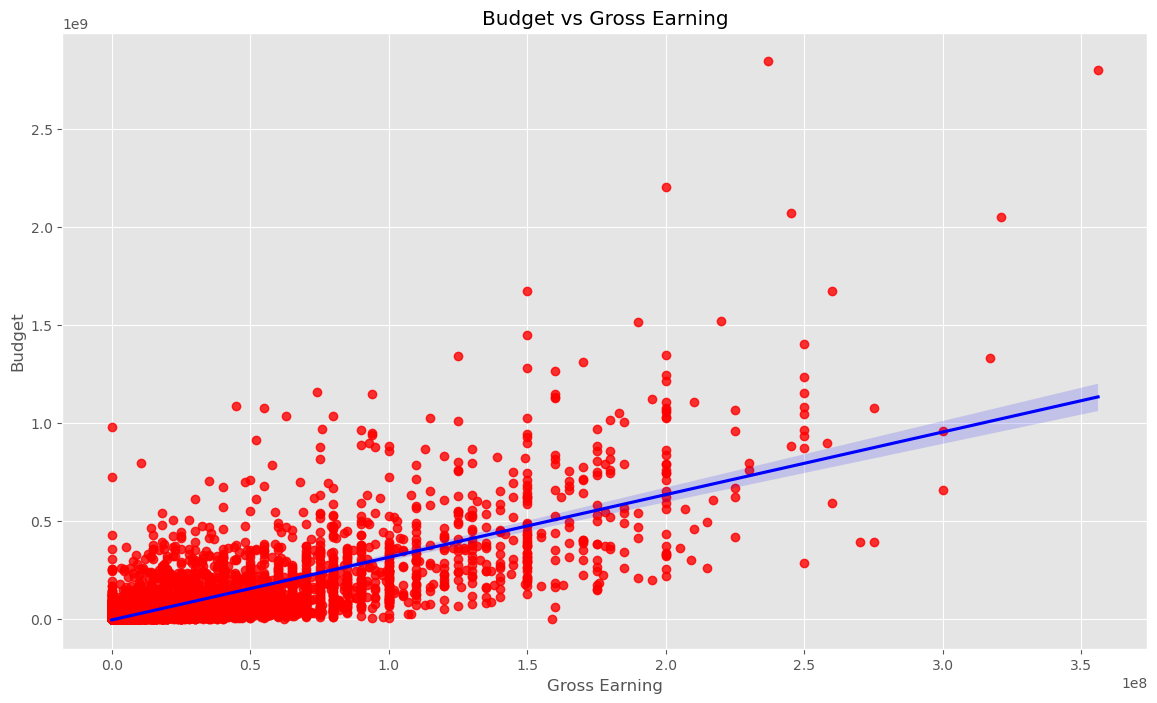

In [31]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.title('Budget vs Gross Earning')

plt.xlabel('Gross Earning')

plt.ylabel('Budget')

plt.show()

In [32]:
# Let's start looking at correlation
df_num = df.select_dtypes('number')
df_num.corr(method='pearson') # pearson, kendell, spearman

,year,score,votes,budget,gross,runtime,month,day
year,1.000000,0.101308,0.214533,0.297709,0.251873,0.113909,-0.016966,0.008768
score,0.101308,1.000000,0.415190,0.053021,0.188071,0.397226,0.056066,-0.010036
votes,0.214533,0.415190,1.000000,0.481902,0.631110,0.309945,0.059592,-0.010136
budget,0.297709,0.053021,0.481902,1.000000,0.749330,0.269020,0.066749,0.004854
gross,0.251873,0.188071,0.631110,0.749330,1.000000,0.245117,0.058009,-0.002326
runtime,0.113909,0.397226,0.309945,0.269020,0.245117,1.000000,0.072531,0.008659
month,-0.016966,0.056066,0.059592,0.066749,0.058009,0.072531,1.000000,0.002264
day,0.008768,-0.010036,-0.010136,0.004854,-0.002326,0.008659,0.002264,1.000000


In [33]:
# Higher the budget higher the gross revenue

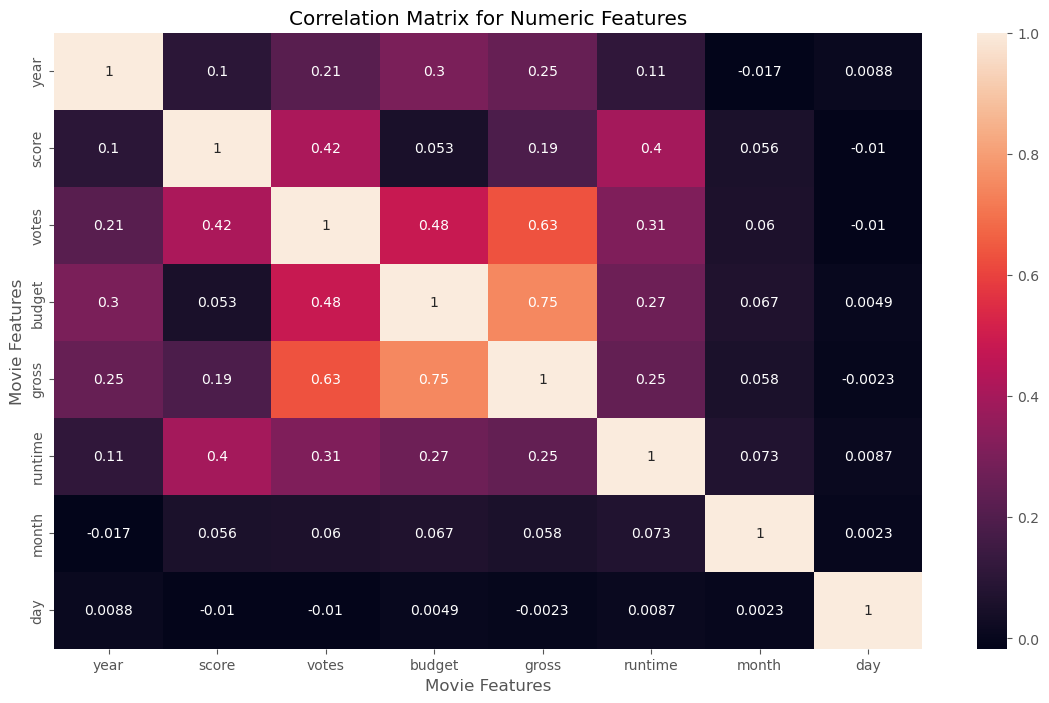

In [34]:
correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [35]:
# Looks at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,month,day
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,12,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,4,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,12,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,12,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,4,27


In [36]:
df_numerized = df.copy()

In [37]:
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype=='object':
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

In [38]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,month,day
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,12,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,4,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,12,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,12,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,0,1672,Polygram Filmed Entertainment,87.0,1998-10-30,10,30
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,0,1605,Balboa Entertainment,110.0,1996-08-30,8,30
3818,"Love, Honor and Obey",R,Comedy,2001,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United States,0,1400,British Broadcasting Corporation (BBC),103.0,2001-02-09,2,9
7580,Run with the Hunted,Not Rated,Crime,2020,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93.0,2020-06-26,6,26


In [39]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,month,day
5445,515,5,0,2009,678,7.8,1100000,1107,1705,2198,54,237000000,2847246203,2115,162.0,2009-12-18,12,18
7445,517,5,0,2019,176,8.4,903000,160,708,2107,54,356000000,2797501328,1508,181.0,2019-04-26,4,26
3045,6668,5,6,1997,686,7.8,1100000,1107,1705,1502,54,200000000,2201647264,2115,194.0,1997-12-19,12,19
6663,4958,5,0,2015,680,7.8,876000,1077,2448,494,54,245000000,2069521700,1446,138.0,2015-12-18,12,18
7244,518,5,0,2018,185,8.4,897000,160,708,2107,54,321000000,2048359754,1508,149.0,2018-04-27,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2592,6,5,1998,2926,6.1,2900,1866,1222,2032,53,0,1672,1755,87.0,1998-10-30,10,30
2906,4234,3,5,1996,510,7.4,37000,1959,1878,1419,12,0,1605,319,110.0,1996-08-30,8,30
3818,3237,6,4,2001,1085,6.5,5200,705,1072,2183,54,0,1400,451,103.0,2001-02-09,2,9
7580,4491,3,5,2020,1780,5.2,735,1391,2117,2143,54,0,682,1869,93.0,2020-06-26,6,26


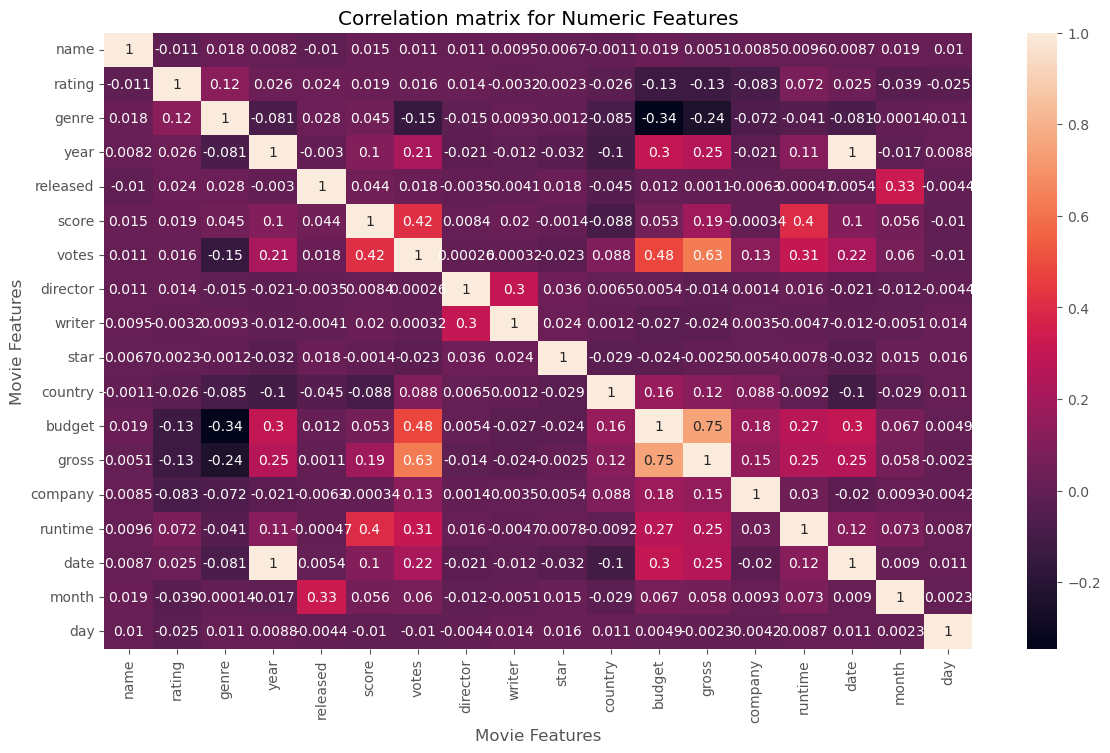

In [40]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [41]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

name  name        1.000000
      rating     -0.010815
      genre       0.018363
      year        0.008209
      released   -0.010012
                    ...   
day   company    -0.004188
      runtime     0.008659
      date        0.010954
      month       0.002264
      day         1.000000
Length: 324, dtype: float64

In [42]:
pd.set_option('display.max_rows', None)

In [43]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

In [44]:
sorted_pairs

name      name        1.000000
star      star        1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
director  director    1.000000
writer    writer      1.000000
country   country     1.000000
rating    rating      1.000000
budget    budget      1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
date      date        1.000000
month     month       1.000000
genre     genre       1.000000
day       day         1.000000
year      date        0.999662
date      year        0.999662
budget    gross       0.749330
gross     budget      0.749330
votes     gross       0.631110
gross     votes       0.631110
budget    votes       0.481902
votes     budget      0.481902
          score       0.415190
score     votes       0.415190
          runtime     0.397226
runtime   score       0.397226
released  month       0.325349
month     released    0.325349
runtime 

In [45]:
high_correlation = sorted_pairs[((sorted_pairs)>0.5) ]

In [46]:
high_correlation=high_correlation[high_correlation<1]

In [47]:
high_correlation_df = pd.DataFrame(high_correlation)

In [48]:
high_correlation_df=high_correlation_df.reset_index()

In [49]:
high_correlation_df

,level_0,level_1,0
0,year,date,0.999662
1,date,year,0.999662
2,budget,gross,0.749330
3,gross,budget,0.749330
4,votes,gross,0.631110
5,gross,votes,0.631110


In [50]:
high_correlation_df.columns=['Var1','Var2','Correlation']

In [51]:
high_correlation_df

,Var1,Var2,Correlation
0,year,date,0.999662
1,date,year,0.999662
2,budget,gross,0.749330
3,gross,budget,0.749330
4,votes,gross,0.631110
5,gross,votes,0.631110


In [52]:
high_correlation_df=high_correlation_df.set_index('Var1')

In [53]:
high_correlation_df=high_correlation_df.transpose()

In [54]:
high_correlation_df

Var1,year,date,budget,gross,votes,gross
Var2,date,year,gross,budget,gross,votes
Correlation,0.999662,0.999662,0.74933,0.74933,0.63111,0.63111
